# Pose Estimation Tutorial

This notebook provides a tutorial for running inference on a static image in order to predict keypoint locations of joints on a human, as well as draw the resulting pose.

First, we need to load our model. In this tutorial we are using the OpenPose estimator from OpenDR:


In [ ]:
import sys
sys.path.append("/home/administrator/Documents/opendr_internal")
from src.opendr.perception.pose_estimation.lightweight_open_pose.lightweight_open_pose_learner import \
    LightweightOpenPoseLearner

We need to create our estimator:

In [ ]:
 pose_estimator = LightweightOpenPoseLearner(device='cuda', num_refinement_stages=2)

Note that we can alter the device (e.g., 'cpu', 'cuda', etc.), on which the model runs, the number of refinement stages that we are using, as well as a number of additional parameters that can make our model either faster or more accurate.

After creating our model, we need to download and load the pre-trained weights:

In [ ]:
pose_estimator.download(path=".", verbose=True)
pose_estimator.load("openpose_default")

We will also download one sample image for testing:

In [ ]:
pose_estimator.download(path=".", mode="test_data")

Let's read this image:

In [ ]:
from os.path import join
import cv2

image_path = join("temp", "dataset", "image", "000000000785.jpg")
img = cv2.imread(image_path)


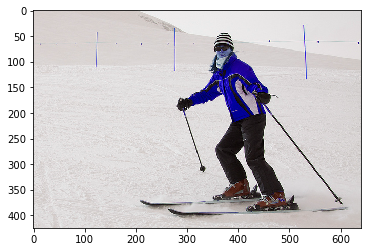

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img)


We are now ready to use our model! The only thing that we have to do is to pass the image through the model. Note that there are standard data types supported by OpenDR. However, OpenDR also understands common data types (e.g,. OpenCV images) and automatically converts them into the most appropriate format:

In [ ]:
poses = pose_estimator.infer(img)

In [ ]:
print(poses)

As we can see, the inference algorithm ran correctly and returned a list of FilteredPose objects (one for each detected pose). We can easily visualize the results:

In [ ]:
from opendr.perception.pose_estimation.lightweight_open_pose.utilities import draw
for pose in poses:
        draw(img, pose)
plt.imshow(img)


... or we can examine the raw keypoints

In [ ]:
print(poses[0].data)

Note that -1 refers to a keypoint that was not detected. The order of the keypoints is provided in `Pose.kpt_names` :

In [ ]:
from opendr.engine.target import Pose
print(Pose.kpt_names)

OpenDR also provides a way to get a specific keypoint easily:

In [ ]:
print(poses[0]['nose'])

... or print the keypoints in a readable format:

In [14]:
print(poses[0])

nose: [360, 92]
neck: [386, 119]
r_sho: [366, 126]
r_elb: [340, 159]
r_wri: [307, 172]
l_sho: [406, 119]
l_elb: [439, 146]
l_wri: [446, 172]
r_hip: [400, 212]
r_knee: [373, 272]
r_ank: [406, 345]
l_hip: [433, 212]
l_knee: [426, 285]
l_ank: [479, 358]
r_eye: [353, 86]
l_eye: [366, 79]
r_ear: [-1, -1]
l_ear: [380, 86]

